In [2]:
#Run this first before proceeding, this allows you to read the file and save it to a variable
import pandas as pd
#change file path to wherever you have the files
path = r'/Users/benrivera/Desktop/Test/HRTest.csv'
HR_Test= pd.read_csv(path)




    Weights Upper Body 

        Push

In [20]:
#Creats a filter to only show workouts labeld as "Weights: Push"
WPU = HR_Test.loc[HR_Test['Type']=='Weights: Push']
#resets the index
WPU = WPU.reset_index(drop=True)
#set the index
#WPU = WPU.set_index('Count')
#drop the columns that are not necessary
WPU = WPU.drop(['Workout', 'Date', 'Type', "Time (min)"], axis=1)

WPU

,Average Heart Rate (bpm),Peak Heart Rate,Count
0,118,167,1
1,102,124,2
2,100,137,3
3,107,132,4
4,99,127,5
5,99,133,6
6,103,131,7
7,99,127,8
8,110,141,9
9,109,143,10


In [21]:
#dependencies for the model

import seaborn as Snapshot
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [23]:

#Creating a prediction model that shows the potential future heart rates
train = WPU.drop(['Average Heart Rate (bpm)'], axis=1)
#Sets what is being predicted
test = WPU['Average Heart Rate (bpm)']
#splits data
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size =.25, random_state = 2)

regr = LinearRegression()

regr.fit(X_train, y_train)

pred = regr.predict(X_test)

print("Predicted average heart rate for the next few workouts are:",pred)


Predicted average heart rate for the next few workouts are: [107.60706846 101.30848949 104.20729704 114.58983504]


In [24]:
#shows the accuracy of the predition model
acc =regr.score(X_test, y_test)
#this turns it from a decimal to a percentage
acc = acc*100
#this prevents it from going beyond two decimal places
acc = "{:.2f}".format(acc)

print('The regression model has an accuracy of ' + acc + "%")

The regression model has an accuracy of 82.02%


In [18]:
%pip install matplotlib
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'Predicted Average Heart Rate')

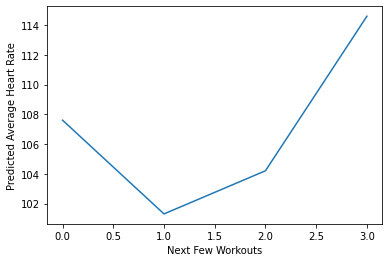

In [27]:
#plots the results
plt.plot(pred)
#changes the title for the x-axis
plt.xlabel("Next Few Workouts")
#changes the title for the y-axis
plt.ylabel("Predicted Average Heart Rate")




In [ ]:
import numpy as np

#finds the standard deviation of heart rates
stdWPU= np.std(WPU["Average Heart Rate (bpm)"])
#plan to remove the ones that don't might be outliers

stdWPU

In [18]:
#Allows us to see evaluate the average hearts rate of push workouts by filtering only those types
WPU = HR_Test.loc[HR_Test['Type']=='Weights: Push']
#resets the index
WPU = WPU.reset_index(drop=True)
WPU = WPU.set_index('Workout')
#Allows us to put Date into the correlation function
WPU['Date']=WPU['Date'].astype('category').cat.codes
#Finds the correlation between Average Heart Rate over multiple workouts, 
WPU_Corr = WPU['Count'].corr(WPU['Average Heart Rate (bpm)'])
WPU_Corr = "{:.2f}".format(WPU_Corr)
print('The correlation of Average Heart Rate for pull weights over multiple workouts is ' + str(WPU_Corr))

The correlation of Average Heart Rate for pull weights over multiple workouts is 0.27


        Pull

In [19]:
#Creats a filter to only show workouts labeld as "Weights: Pull"
WPL = HR_Test.loc[HR_Test['Type']=='Weights: Pull']
#resets the index
WPL = WPL.reset_index(drop=True)
#Drop unessecary columns
WPL = WPL.drop(['Workout', 'Date', 'Type'], axis=1)
#Set the index to the count
WPL = WPL.set_index('Count')
WPL

,Average Heart Rate (bpm),Peak Heart Rate,Time (min)
Count,,,
1,114,150,45
2,105,134,40
3,118,156,45
4,120,152,40
5,112,137,39
6,111,131,35
7,118,143,36
8,106,130,38
9,118,141,33


In [21]:
#Allows us to see evaluate the average hearts rate of pull workouts by filtering only those types
WPL = HR_Test.loc[HR_Test['Type']=='Weights: Pull']
#resets the index
WPL = WPL.reset_index(drop=True)
WPL = WPL.set_index('Workout')
#Finds the correlation between Average Heart Rate over multiple workouts, 
WPL_Corr = WPL['Count'].corr(WPL['Average Heart Rate (bpm)'])
WPL_Corr = "{:.2f}".format(WPL_Corr )
print('The correlation of Average Heart Rate for pull weights over multiple workouts is ' + str(WPL_Corr))

The correlation of Average Heart Rate for pull weights over multiple workouts is 0.19


    Weigths: Lower Body 

In [22]:
WLB = HR_Test.loc[HR_Test['Type']=='Weights: Legs']
#resets index
WLB = WLB.reset_index(drop=True)
#Drop unessecary columns
WLB = WLB.drop(['Workout', 'Date', 'Type'], axis=1)
#Set the index to the count
WLB = WLB.set_index('Count')

WLB

,Average Heart Rate (bpm),Peak Heart Rate,Time (min)
Count,,,
1,134,170,45
2,138,186,50
3,124,171,35
4,112,161,40
5,135,173,30


In [23]:
WLB = HR_Test.loc[HR_Test['Type']=='Weights: Legs']
#resets index
WLB = WLB.reset_index(drop=True)
WLB = WLB.set_index('Workout')
#Finds the correlation between Average Heart Rate over multiple workouts, 
WLB_Corr = WLB['Count'].corr(WLB['Average Heart Rate (bpm)'])
WLB_Corr = "{:.2f}".format(WLB_Corr )
print('The correlation of Average Heart Rate for leg weights over multiple workouts is ' + str(WLB_Corr))

The correlation of Average Heart Rate for leg weights over multiple workouts is -0.36


    Cardio: Elliptical

In [24]:
CE = HR_Test.loc[HR_Test['Type']=='Cardio: Elliptical']
#resets index
CE = CE.reset_index(drop=True)
#Drop unessecary columns
CE = CE.drop(['Workout', 'Date', 'Type'], axis=1)
#Set the index to the count
CE = CE.set_index('Count')
CE

,Average Heart Rate (bpm),Peak Heart Rate,Time (min)
Count,,,
1,151,164,20
2,150,164,30
3,149,168,30
4,144,159,30
5,143,159,30


In [ ]:
CE = HR_Test.loc[HR_Test['Type']=='Cardio: Elliptical']
#resets index
CE = CE.reset_index(drop=True)
CE = CE.set_index('Workout')
#Finds the correlation between Average Heart Rate over multiple workouts, 
CE_Corr = CE['Count'].corr(CE['Average Heart Rate (bpm)'])
CE_Corr = "{:.2f}".format(CE_Corr )
print('The correlation of Average Heart Rate for elliptical over multiple workouts is ' + str(CE_Corr))

    Cardio: Treadmill

In [ ]:
CT = HR_Test.loc[HR_Test['Type']=='Cardio: Treadmill']
#resets index
CT = CT.reset_index(drop=True)
#Drop unessecary columns
CT = CT.drop(['Workout', 'Date', 'Type'], axis=1)
#Set the index to the count
CT = CT.set_index('Count')
CT

In [ ]:
CT = HR_Test.loc[HR_Test['Type']=='Cardio: Treadmill']
#resets index
CT = CT.reset_index(drop=True)
CT = CT.set_index('Workout')
#Finds the correlation between Average Heart Rate over multiple workouts, 
CT_Corr = CT['Count'].corr(CT['Average Heart Rate (bpm)'])
CT_Corr = "{:.2f}".format(CT_Corr)
print('The correlation of Average Heart Rate for treadmill over multiple workouts is ' + str(CT_Corr))

Pre Workout Test

In [ ]:
PW_Test

In [ ]:
#Allows Strings to be read as integers
PW_Test['Pre Workout']=PW_Test['Pre Workout'].astype('category').cat.codes

PW_Test.corr()